# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


**Nama dataset:** Weather Forecast Dataset

Dataset ini merupakan dataset mengenai klasifikasi cuaca yang berisi 2.500 pengamatan, digunakan untuk memprediksi curah hujan (rain/no rain).

**Struktur dataset:**

1. Temperature
2. Humidity
3. Wind_Speed
4. Cloud_Cover
5. Pressure
6. Rain

**Sumber dataset:** https://www.kaggle.com/datasets/zeeshier/weather-forecast-dataset

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv("../namadataset_raw/weather_forecast.csv")

In [3]:
# menampilkan 5 baris pertama dataset
df.head(5)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [4]:
# mengecek struktur dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [5]:
# melihat distribusi data target
df['Rain'].value_counts()

Rain
no rain    2186
rain        314
Name: count, dtype: int64

In [6]:
# menampilkan statistik deskriptif untuk variabel numerik
df.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [7]:
# mengecek data yang memiliki nilai kosong (missing values)
df.isnull().sum()

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64

In [8]:
# mengecek data yang duplikat
df.duplicated().sum()

np.int64(0)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

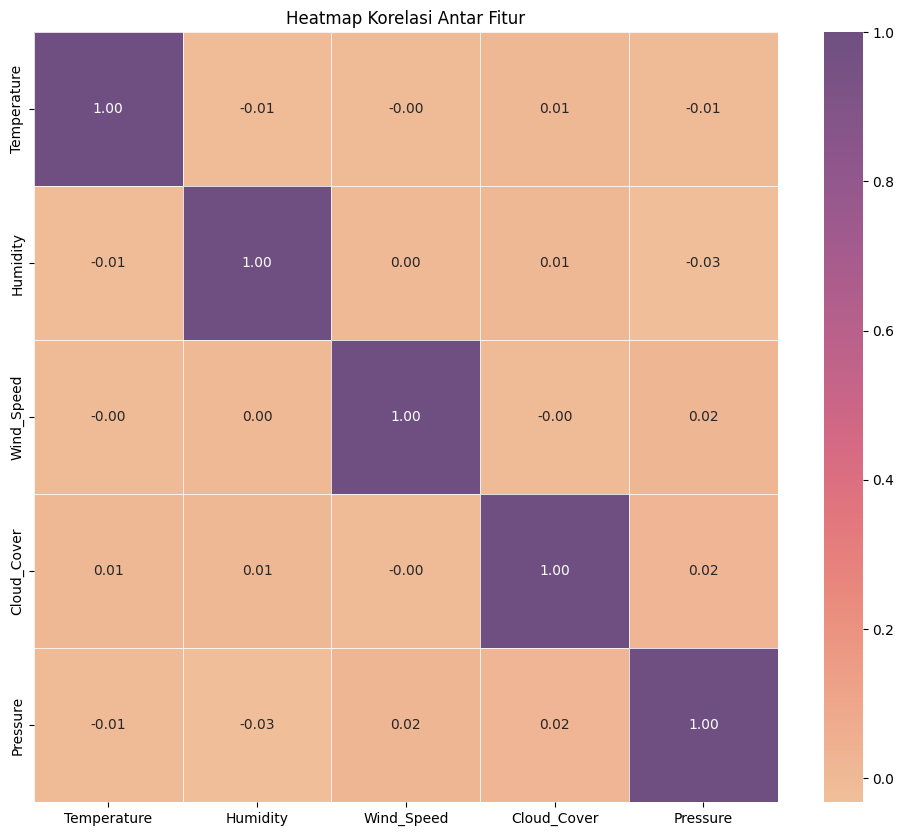

In [9]:
#Type your code here
# menampilkan korelasi antar fitur
numerical_cols = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 10))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='flare', fmt='.2f', linewidths=0.5, alpha=0.8)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

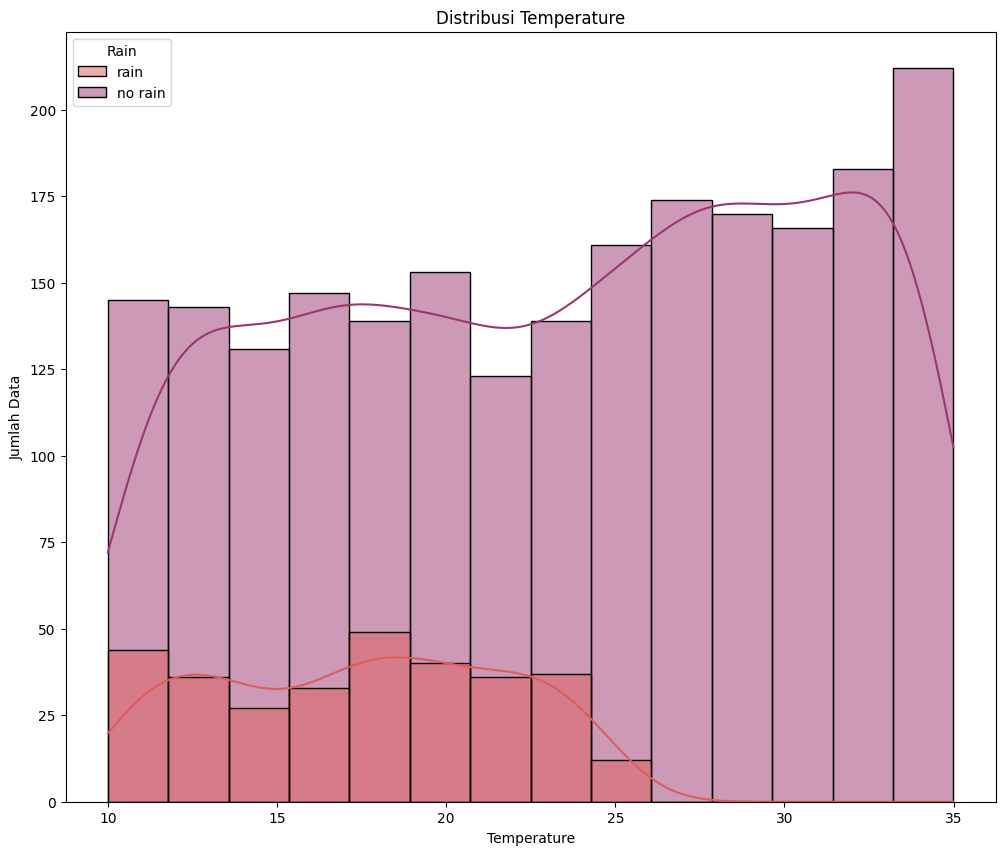

In [10]:
# visualisasi distribusi Temperature (suhu)
plt.figure(figsize=(12, 10))
sns.histplot(data=df, x='Temperature', hue='Rain', palette='flare', kde=True)

plt.title('Distribusi Temperature')
plt.xlabel('Temperature')
plt.ylabel('Jumlah Data')
plt.show()

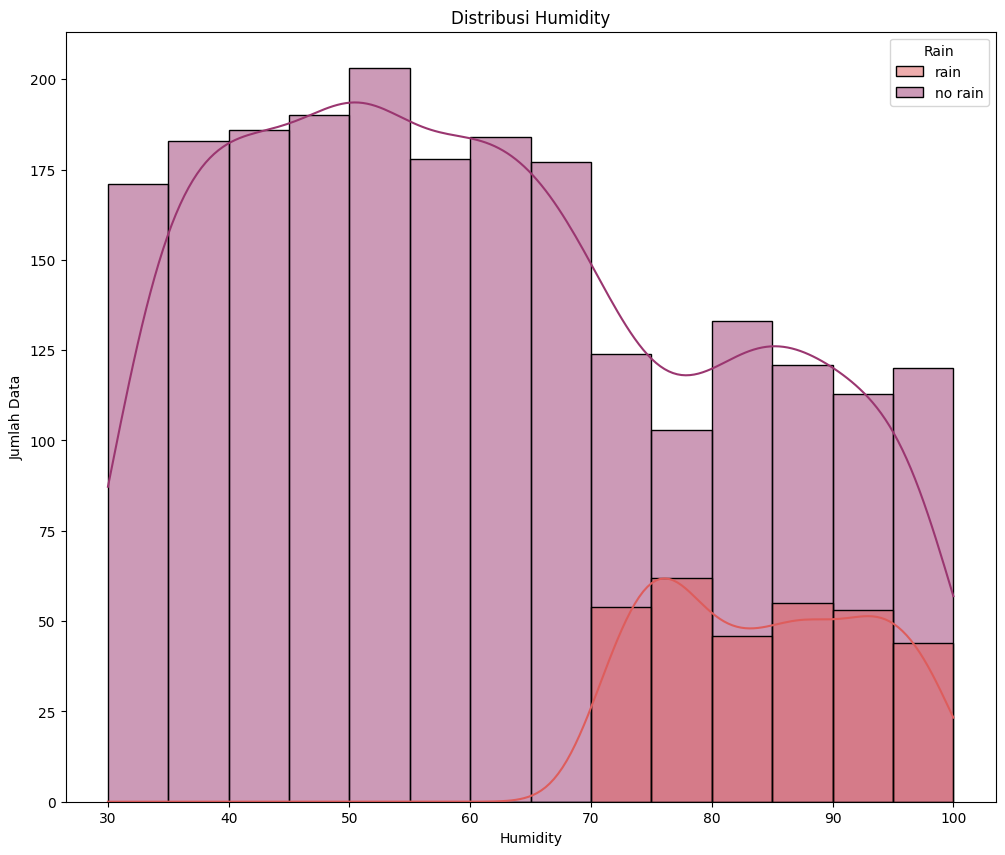

In [11]:
# visualisasi distribusi Humidity (kelembapan)
plt.figure(figsize=(12, 10))
sns.histplot(data=df, x='Humidity', hue='Rain', palette='flare', kde=True)

plt.title('Distribusi Humidity')
plt.xlabel('Humidity')
plt.ylabel('Jumlah Data')
plt.show()

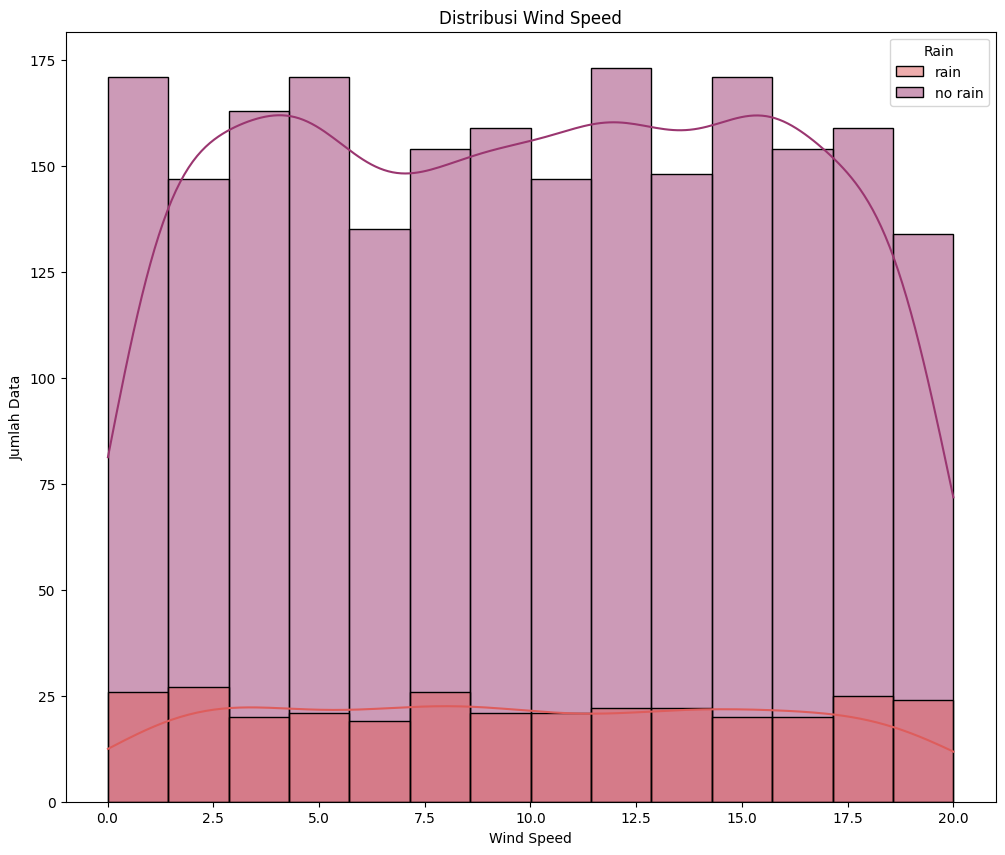

In [12]:
# visualisasi distribusi Wind Speed (kecepatan angin)
plt.figure(figsize=(12, 10))
sns.histplot(data=df, x='Wind_Speed', hue='Rain', palette='flare', kde=True)

plt.title('Distribusi Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Jumlah Data')
plt.show()

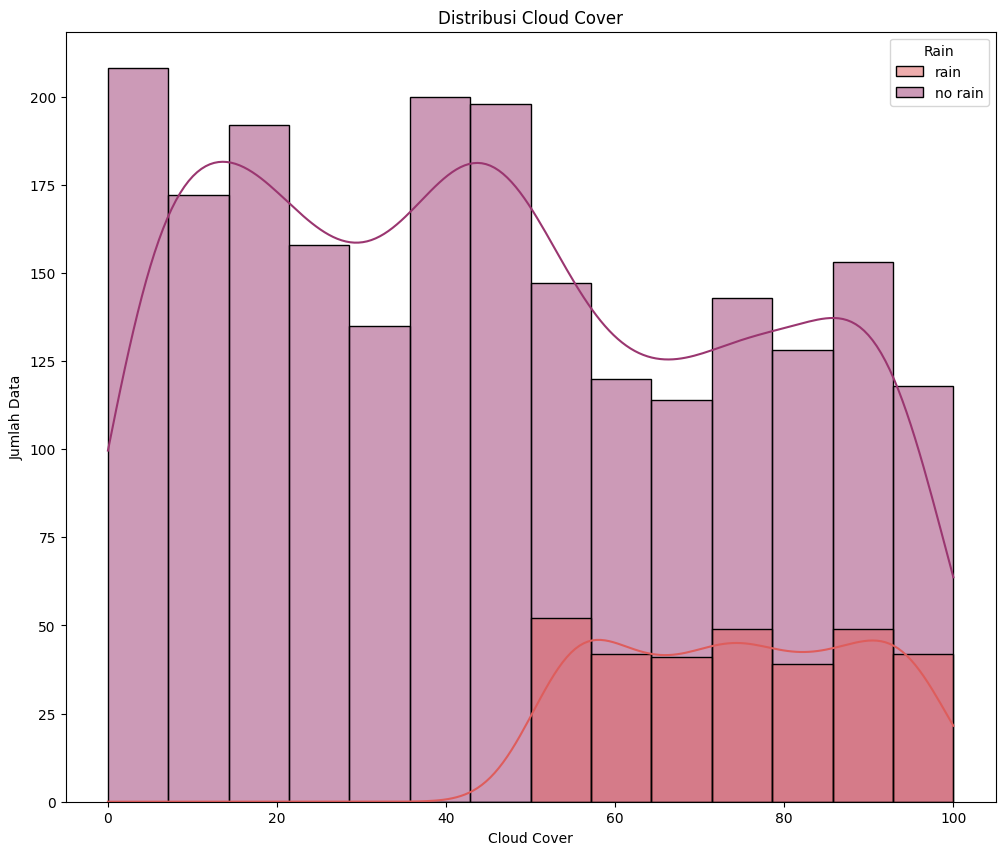

In [13]:
# visualisasi distribusi Cloud Cover (tutupan awan)
plt.figure(figsize=(12, 10))
sns.histplot(data=df, x='Cloud_Cover', hue='Rain', palette='flare', kde=True)

plt.title('Distribusi Cloud Cover')
plt.xlabel('Cloud Cover')
plt.ylabel('Jumlah Data')
plt.show()

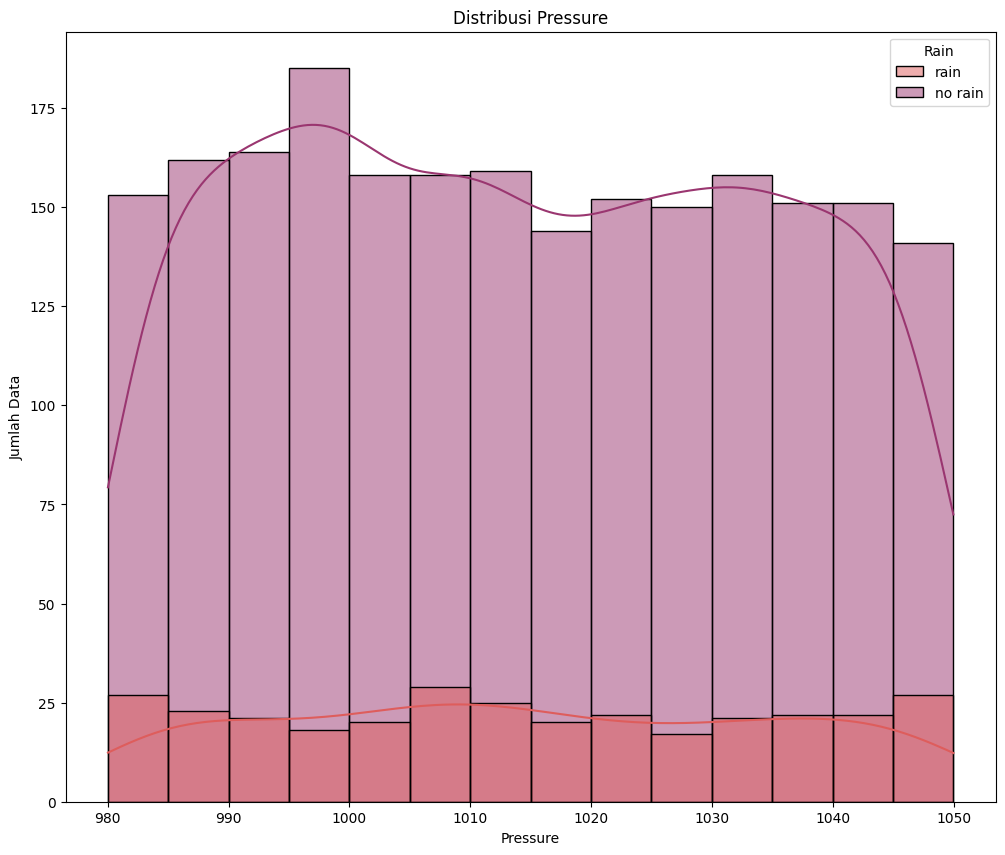

In [14]:
# visualisasi distribusi Pressure (tekanan)
plt.figure(figsize=(12, 10))
sns.histplot(data=df, x='Pressure', hue='Rain', palette='flare', kde=True)

plt.title('Distribusi Pressure')
plt.xlabel('Pressure')
plt.ylabel('Jumlah Data')
plt.show()

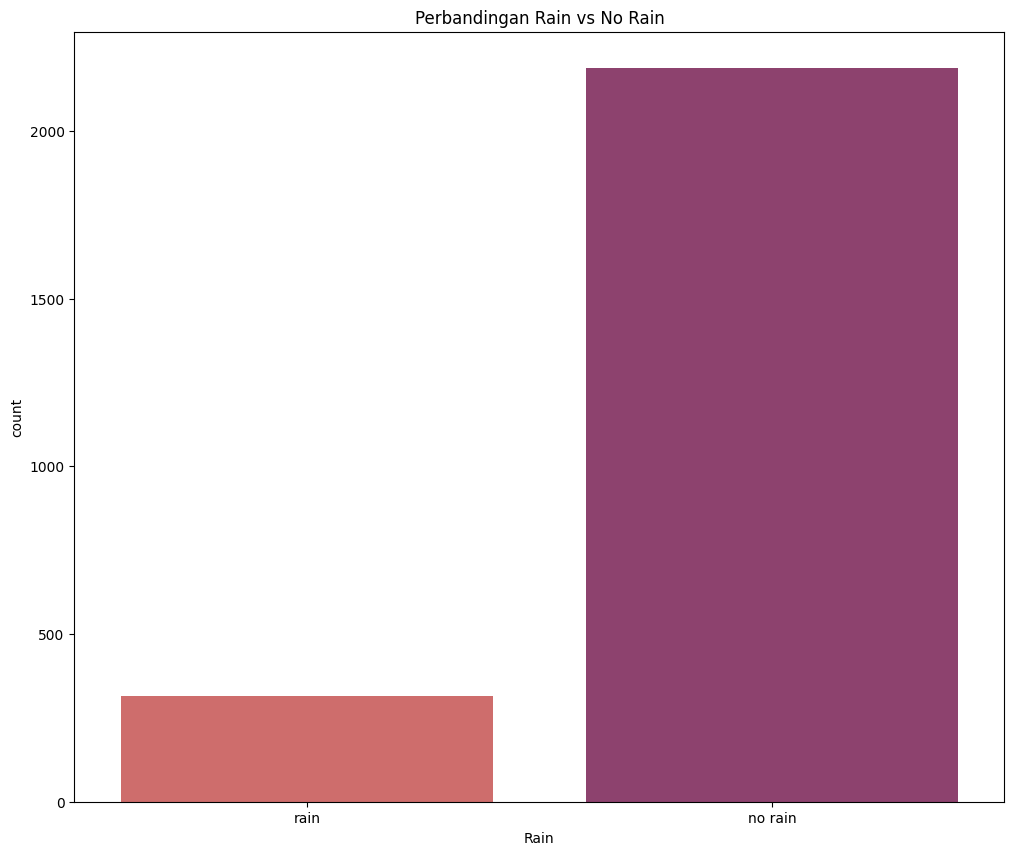

In [15]:
# visualisasi fitur target weather_condition (kondisi cuaca)
plt.figure(figsize=(12, 10))
sns.countplot(data=df, x='Rain', hue='Rain', palette='flare', legend=False)
plt.title('Perbandingan Rain vs No Rain')
plt.show()

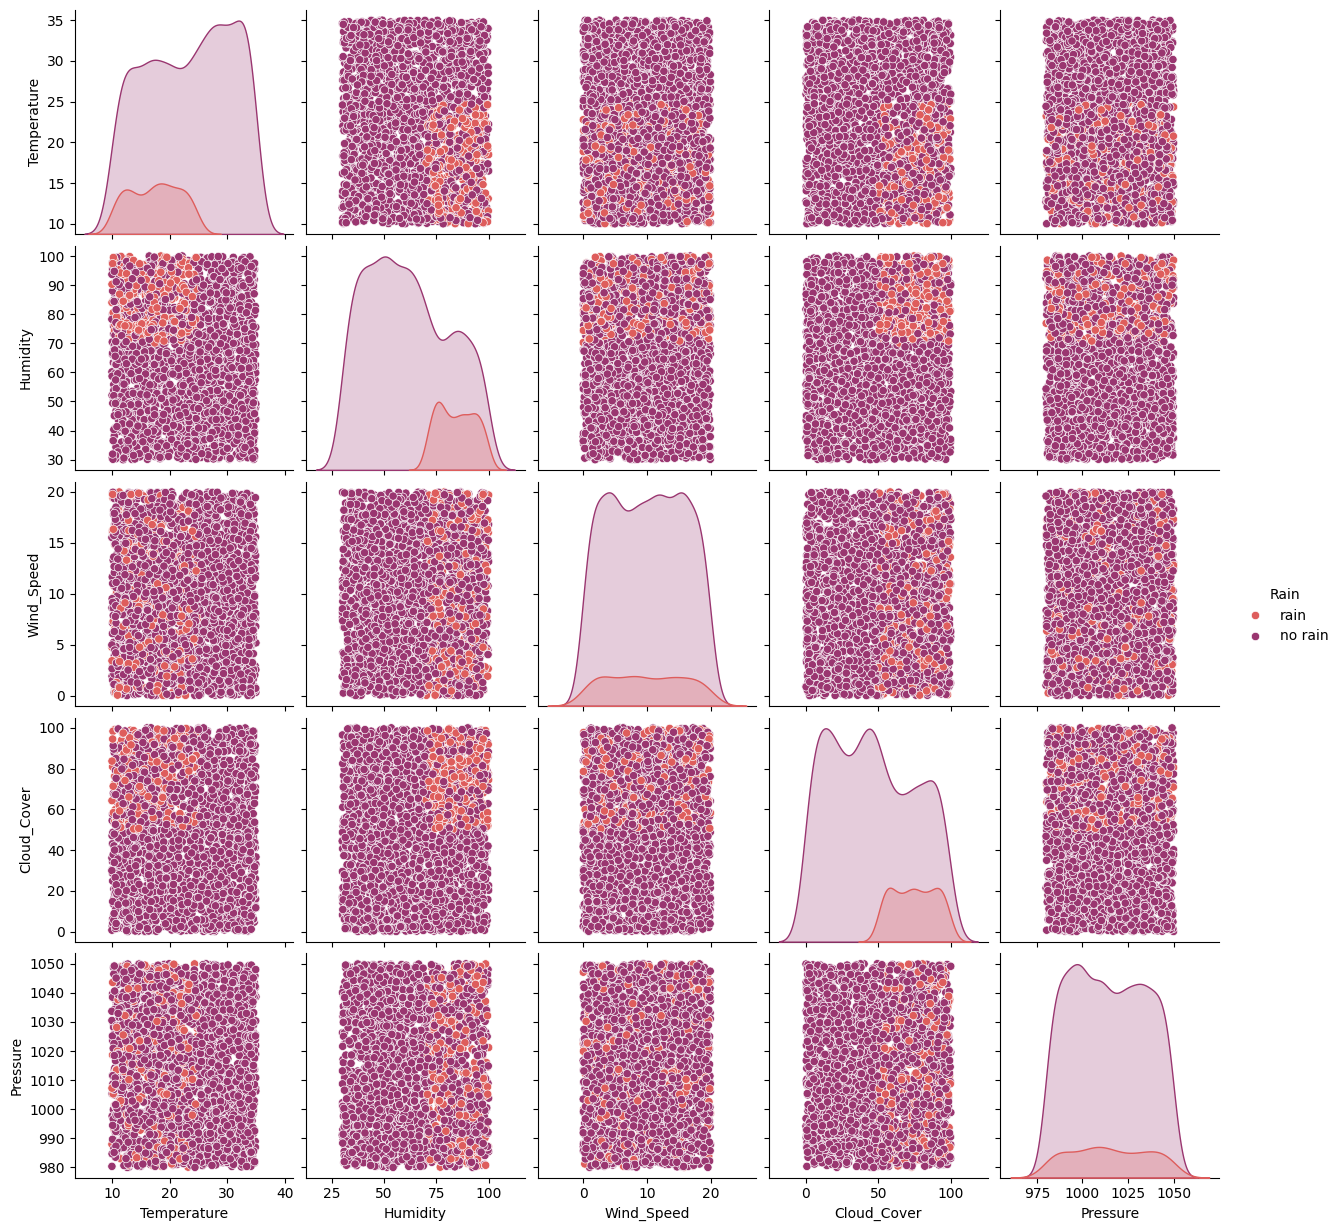

In [16]:
# visualisasi yang lebih informatif
numerical_cols = df.select_dtypes(include=['number'])
sns.pairplot(df, vars=numerical_cols.columns, hue='Rain', palette='flare')
plt.show()

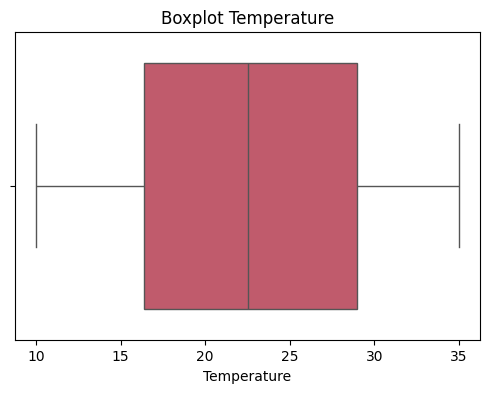

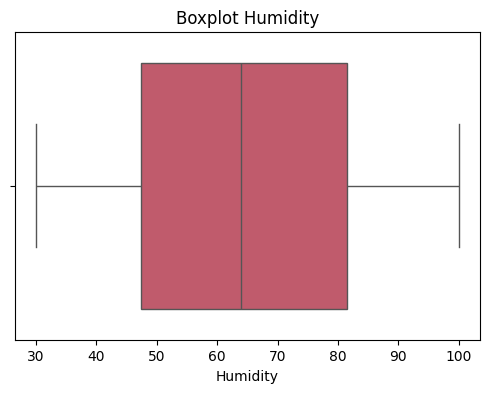

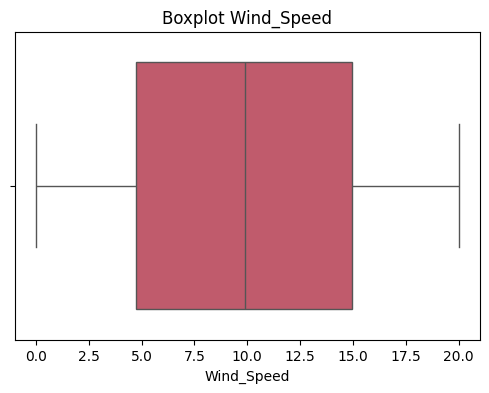

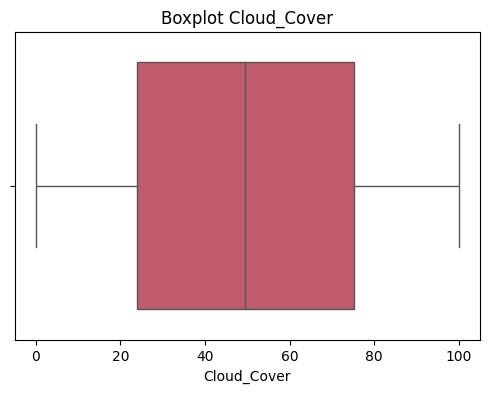

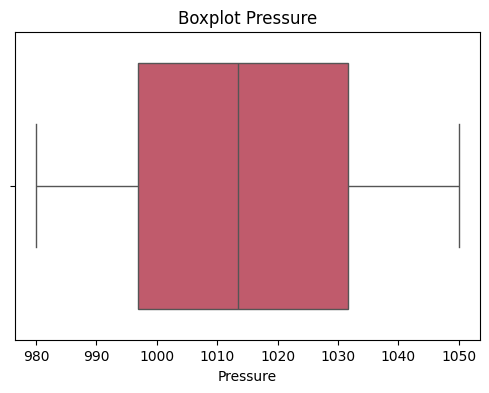

In [17]:
# mengecek outlier
for col in numerical_cols:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=df[col], color=sns.color_palette("flare")[2])
  plt.title(f'Boxplot {col}')
  plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [18]:
# menangani data yang memiliki missing values
df = df.dropna()

In [19]:
# menangani data duplikat
df = df.drop_duplicates()

In [20]:
# melakukan feature encoding data kategorikal
# rain=1 dan no rain=0
encoder = LabelEncoder()
df['Rain'] = encoder.fit_transform(df['Rain'])

In [21]:
# melakukan feature scaling
X = df.drop(columns='Rain')
y = df['Rain']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_processed = pd.DataFrame(X_scaled, columns=X.columns)
df_processed['Rain'] = y.values

In [22]:
# menampilkan 5 baris pertama dataset setelah melakukan feature encoding dan scaling
df_processed.head(5)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,0.155431,1.265393,-0.444814,0.028972,0.894714,1
1,0.723225,-0.895074,-0.684143,-1.534074,-1.074570,0
2,0.339547,0.938599,-1.476731,-1.195246,-0.350663,0
3,0.142018,0.502270,-0.494138,0.604355,-1.568924,1
4,-0.271701,1.629599,-0.910571,-0.068058,-1.658406,0


In [23]:
# menyimpan dataset hasil preprocessing
df_processed.to_csv("namadataset_preprocessing/weather_forecast_preprocessing.csv", index=False)